# 02: model training

this notebook demonstrates training cnn models on cifar-10 with different architectures and hyperparameters.


In [7]:
import sys
sys.path.append('../src')

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
from src.config import Config
from src.datasets import get_cifar10_loaders
from src.models import create_model
from src.trainer import Trainer
from src.utils import set_seed, plot_training_curves

set_seed(42)
config = Config()
print(f"training on: {config.device}")

training on: cuda


## load data and create model


In [8]:
train_loader, val_loader, test_loader = get_cifar10_loaders(config)
model = create_model('simple_cnn', config).to(config.device)

print(f"model: {model.__class__.__name__}")
print(f"parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

sample_batch = next(iter(train_loader))
images, labels = sample_batch
images, labels = images.to(config.device), labels.to(config.device)

with torch.no_grad():
    outputs = model(images)
    print(f"input shape: {images.shape}")
    print(f"output shape: {outputs.shape}")
    print(f"output range: [{outputs.min():.3f}, {outputs.max():.3f}]")


model: SimpleCNN
parameters: 1,147,914
trainable parameters: 1,147,914
input shape: torch.Size([128, 3, 32, 32])
output shape: torch.Size([128, 10])
output range: [-1.052, 1.310]


## train simple cnn


In [9]:
trainer = Trainer(model, config)

print("starting training...")
history = trainer.fit(train_loader, val_loader)

print(f"best validation accuracy: {max(history['val_acc']):.4f}")
print(f"final training accuracy: {history['train_acc'][-1]:.4f}")
print(f"final validation accuracy: {history['val_acc'][-1]:.4f}")


starting training...
Training on cuda
Model parameters: 1,147,914

Epoch 1/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 262.37it/s]


Train Loss: 1.6175, Train Acc: 40.03%
Val Loss: 1.3130, Val Acc: 52.62%
New best validation accuracy: 52.62%

Epoch 2/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 275.02it/s]


Train Loss: 1.2950, Train Acc: 53.03%
Val Loss: 1.1367, Val Acc: 59.30%
New best validation accuracy: 59.30%

Epoch 3/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 266.67it/s]


Train Loss: 1.1559, Train Acc: 58.42%
Val Loss: 0.9113, Val Acc: 67.35%
New best validation accuracy: 67.35%

Epoch 4/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 282.80it/s]


Train Loss: 1.0605, Train Acc: 62.03%
Val Loss: 0.8986, Val Acc: 68.22%
New best validation accuracy: 68.22%

Epoch 5/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 254.22it/s]


Train Loss: 0.9876, Train Acc: 64.85%
Val Loss: 0.8260, Val Acc: 70.67%
New best validation accuracy: 70.67%

Epoch 6/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 256.75it/s]


Train Loss: 0.9372, Train Acc: 66.59%
Val Loss: 0.7726, Val Acc: 72.61%
New best validation accuracy: 72.61%

Epoch 7/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 254.15it/s]


Train Loss: 0.8897, Train Acc: 68.67%
Val Loss: 0.7579, Val Acc: 72.79%
New best validation accuracy: 72.79%

Epoch 8/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 271.79it/s]


Train Loss: 0.8602, Train Acc: 69.76%
Val Loss: 0.7232, Val Acc: 74.35%
New best validation accuracy: 74.35%

Epoch 9/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 289.72it/s]


Train Loss: 0.8187, Train Acc: 71.33%
Val Loss: 0.6819, Val Acc: 75.60%
New best validation accuracy: 75.60%

Epoch 10/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 298.09it/s]


Train Loss: 0.7922, Train Acc: 72.03%
Val Loss: 0.6892, Val Acc: 75.84%
New best validation accuracy: 75.84%

Epoch 11/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 268.00it/s]


Train Loss: 0.7624, Train Acc: 73.31%
Val Loss: 0.7100, Val Acc: 74.78%

Epoch 12/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 267.08it/s]


Train Loss: 0.7408, Train Acc: 74.12%
Val Loss: 0.7222, Val Acc: 74.63%

Epoch 13/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 257.40it/s]


Train Loss: 0.7189, Train Acc: 74.82%
Val Loss: 0.6806, Val Acc: 76.11%
New best validation accuracy: 76.11%

Epoch 14/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 272.48it/s]


Train Loss: 0.6971, Train Acc: 75.45%
Val Loss: 0.5941, Val Acc: 79.30%
New best validation accuracy: 79.30%

Epoch 15/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 273.43it/s]


Train Loss: 0.6844, Train Acc: 76.12%
Val Loss: 0.6033, Val Acc: 78.67%

Epoch 16/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 290.39it/s]


Train Loss: 0.6645, Train Acc: 76.88%
Val Loss: 0.5748, Val Acc: 79.58%
New best validation accuracy: 79.58%

Epoch 17/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 251.33it/s]


Train Loss: 0.6458, Train Acc: 77.60%
Val Loss: 0.5756, Val Acc: 79.92%
New best validation accuracy: 79.92%

Epoch 18/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 269.22it/s]


Train Loss: 0.6230, Train Acc: 78.14%
Val Loss: 0.5695, Val Acc: 80.09%
New best validation accuracy: 80.09%

Epoch 19/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 277.88it/s]


Train Loss: 0.6152, Train Acc: 78.44%
Val Loss: 0.5567, Val Acc: 80.53%
New best validation accuracy: 80.53%

Epoch 20/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 265.85it/s]


Train Loss: 0.6032, Train Acc: 79.01%
Val Loss: 0.5478, Val Acc: 80.57%
New best validation accuracy: 80.57%

Epoch 21/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 269.45it/s]


Train Loss: 0.5825, Train Acc: 79.56%
Val Loss: 0.5417, Val Acc: 81.15%
New best validation accuracy: 81.15%

Epoch 22/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 254.46it/s]


Train Loss: 0.5764, Train Acc: 79.99%
Val Loss: 0.5217, Val Acc: 81.32%
New best validation accuracy: 81.32%

Epoch 23/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 283.83it/s]


Train Loss: 0.5668, Train Acc: 80.19%
Val Loss: 0.5273, Val Acc: 81.31%

Epoch 24/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 224.86it/s]


Train Loss: 0.5588, Train Acc: 80.39%
Val Loss: 0.5684, Val Acc: 80.32%

Epoch 25/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 272.97it/s]


Train Loss: 0.5441, Train Acc: 80.98%
Val Loss: 0.4936, Val Acc: 82.33%
New best validation accuracy: 82.33%

Epoch 26/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 278.54it/s]


Train Loss: 0.5388, Train Acc: 81.14%
Val Loss: 0.5406, Val Acc: 81.04%

Epoch 27/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 254.15it/s]


Train Loss: 0.5209, Train Acc: 81.82%
Val Loss: 0.5069, Val Acc: 82.54%
New best validation accuracy: 82.54%

Epoch 28/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 267.66it/s]


Train Loss: 0.5167, Train Acc: 82.05%
Val Loss: 0.5076, Val Acc: 82.60%
New best validation accuracy: 82.60%

Epoch 29/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 258.60it/s]


Train Loss: 0.5101, Train Acc: 82.40%
Val Loss: 0.5053, Val Acc: 82.39%

Epoch 30/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 270.90it/s]


Train Loss: 0.5003, Train Acc: 82.79%
Val Loss: 0.4691, Val Acc: 83.50%
New best validation accuracy: 83.50%

Training completed in 53.43s
Best validation accuracy: 83.50%
model registered with id: SimpleCNN_20251024_174825
best validation accuracy: 83.5000
final training accuracy: 82.7875
final validation accuracy: 83.5000


## plot training curves


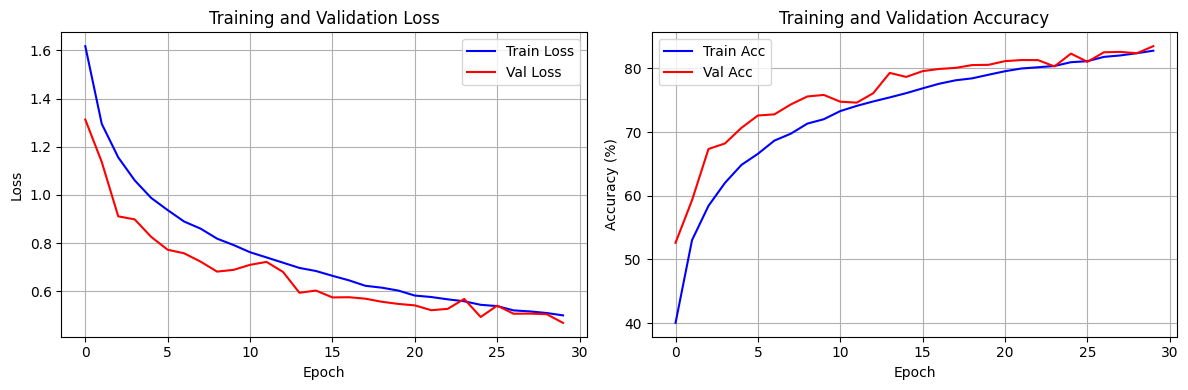

In [10]:
plot_training_curves(history=history)

## test improved cnn


In [11]:
improved_model = create_model('improved_cnn', config).to(config.device)
improved_trainer = Trainer(improved_model, config)

print(f"improved model parameters: {sum(p.numel() for p in improved_model.parameters()):,}")

print("training improved cnn...")
improved_history = improved_trainer.fit(train_loader, val_loader)

print(f"improved best validation accuracy: {max(improved_history['val_acc']):.4f}")
print(f"improved final training accuracy: {improved_history['train_acc'][-1]:.4f}")
print(f"improved final validation accuracy: {improved_history['val_acc'][-1]:.4f}")


improved model parameters: 1,186,826
training improved cnn...
Training on cuda
Model parameters: 1,186,826

Epoch 1/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 102.61it/s]


Train Loss: 1.5737, Train Acc: 41.65%
Val Loss: 1.3842, Val Acc: 49.94%
New best validation accuracy: 49.94%

Epoch 2/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 101.33it/s]


Train Loss: 1.2360, Train Acc: 55.52%
Val Loss: 1.3428, Val Acc: 55.58%
New best validation accuracy: 55.58%

Epoch 3/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 100.65it/s]


Train Loss: 1.0969, Train Acc: 60.77%
Val Loss: 1.0740, Val Acc: 62.00%
New best validation accuracy: 62.00%

Epoch 4/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 104.64it/s]


Train Loss: 0.9982, Train Acc: 64.67%
Val Loss: 1.0357, Val Acc: 63.48%
New best validation accuracy: 63.48%

Epoch 5/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 107.23it/s]


Train Loss: 0.9314, Train Acc: 67.05%
Val Loss: 1.0035, Val Acc: 65.57%
New best validation accuracy: 65.57%

Epoch 6/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 105.21it/s]


Train Loss: 0.8720, Train Acc: 69.02%
Val Loss: 1.0280, Val Acc: 65.67%
New best validation accuracy: 65.67%

Epoch 7/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 106.34it/s]


Train Loss: 0.8252, Train Acc: 70.75%
Val Loss: 0.9150, Val Acc: 67.22%
New best validation accuracy: 67.22%

Epoch 8/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 106.40it/s]


Train Loss: 0.7697, Train Acc: 73.00%
Val Loss: 0.8170, Val Acc: 72.20%
New best validation accuracy: 72.20%

Epoch 9/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 103.86it/s]


Train Loss: 0.7365, Train Acc: 74.19%
Val Loss: 0.8346, Val Acc: 71.31%

Epoch 10/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 101.41it/s]


Train Loss: 0.6993, Train Acc: 75.54%
Val Loss: 0.8305, Val Acc: 72.14%

Epoch 11/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 99.46it/s]


Train Loss: 0.6716, Train Acc: 76.68%
Val Loss: 0.6865, Val Acc: 75.94%
New best validation accuracy: 75.94%

Epoch 12/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 95.94it/s]


Train Loss: 0.6460, Train Acc: 77.72%
Val Loss: 0.7202, Val Acc: 75.43%

Epoch 13/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 91.08it/s]


Train Loss: 0.6163, Train Acc: 78.63%
Val Loss: 0.6593, Val Acc: 77.30%
New best validation accuracy: 77.30%

Epoch 14/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 92.78it/s]


Train Loss: 0.5943, Train Acc: 79.31%
Val Loss: 0.6514, Val Acc: 77.42%
New best validation accuracy: 77.42%

Epoch 15/30
--------------------------------------------------


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 100.57it/s]


Train Loss: 0.5771, Train Acc: 80.01%
Val Loss: 0.6520, Val Acc: 77.70%
New best validation accuracy: 77.70%

Epoch 16/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 99.32it/s]


Train Loss: 0.5570, Train Acc: 81.14%
Val Loss: 0.7489, Val Acc: 75.15%

Epoch 17/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 91.68it/s]


Train Loss: 0.5393, Train Acc: 81.28%
Val Loss: 0.6456, Val Acc: 79.37%
New best validation accuracy: 79.37%

Epoch 18/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 82.51it/s]


Train Loss: 0.5280, Train Acc: 81.61%
Val Loss: 0.5477, Val Acc: 81.22%
New best validation accuracy: 81.22%

Epoch 19/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 88.77it/s]


Train Loss: 0.5047, Train Acc: 82.55%
Val Loss: 0.5701, Val Acc: 80.95%

Epoch 20/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 94.63it/s]


Train Loss: 0.5031, Train Acc: 82.81%
Val Loss: 0.6088, Val Acc: 80.04%

Epoch 21/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 94.94it/s]


Train Loss: 0.4838, Train Acc: 83.48%
Val Loss: 0.5418, Val Acc: 81.19%

Epoch 22/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 92.31it/s]


Train Loss: 0.4741, Train Acc: 83.69%
Val Loss: 0.6035, Val Acc: 79.98%

Epoch 23/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 83.97it/s]


Train Loss: 0.4561, Train Acc: 84.11%
Val Loss: 0.5200, Val Acc: 82.15%
New best validation accuracy: 82.15%

Epoch 24/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 92.41it/s]


Train Loss: 0.4572, Train Acc: 84.28%
Val Loss: 0.5194, Val Acc: 82.24%
New best validation accuracy: 82.24%

Epoch 25/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 91.48it/s]


Train Loss: 0.4411, Train Acc: 84.81%
Val Loss: 0.5235, Val Acc: 82.75%
New best validation accuracy: 82.75%

Epoch 26/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 93.14it/s]


Train Loss: 0.4274, Train Acc: 85.10%
Val Loss: 0.5083, Val Acc: 82.95%
New best validation accuracy: 82.95%

Epoch 27/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 72.85it/s]


Train Loss: 0.4253, Train Acc: 85.29%
Val Loss: 0.5836, Val Acc: 81.14%

Epoch 28/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 91.56it/s]


Train Loss: 0.4140, Train Acc: 85.66%
Val Loss: 0.6064, Val Acc: 80.74%

Epoch 29/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 92.71it/s]


Train Loss: 0.4027, Train Acc: 85.88%
Val Loss: 0.4648, Val Acc: 84.21%
New best validation accuracy: 84.21%

Epoch 30/30
--------------------------------------------------


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 84.30it/s]

Train Loss: 0.3957, Train Acc: 86.19%
Val Loss: 0.5049, Val Acc: 83.42%

Training completed in 302.79s
Best validation accuracy: 84.21%
model registered with id: ImprovedCNN_20251024_175420
improved best validation accuracy: 84.2100
improved final training accuracy: 86.1900
improved final validation accuracy: 83.4200


## compare models


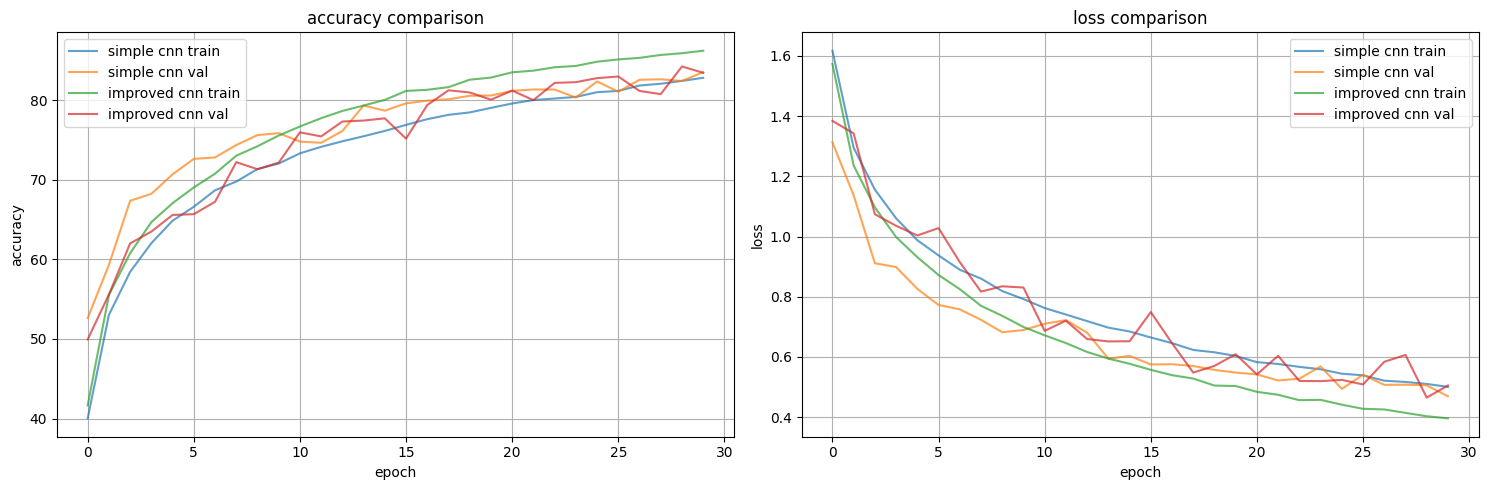

simple cnn best val acc: 83.5000
improved cnn best val acc: 84.2100
improvement: 0.7100


In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history['train_acc'], label='simple cnn train', alpha=0.7)
axes[0].plot(history['val_acc'], label='simple cnn val', alpha=0.7)
axes[0].plot(improved_history['train_acc'], label='improved cnn train', alpha=0.7)
axes[0].plot(improved_history['val_acc'], label='improved cnn val', alpha=0.7)
axes[0].set_title('accuracy comparison')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history['train_loss'], label='simple cnn train', alpha=0.7)
axes[1].plot(history['val_loss'], label='simple cnn val', alpha=0.7)
axes[1].plot(improved_history['train_loss'], label='improved cnn train', alpha=0.7)
axes[1].plot(improved_history['val_loss'], label='improved cnn val', alpha=0.7)
axes[1].set_title('loss comparison')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"simple cnn best val acc: {max(history['val_acc']):.4f}")
print(f"improved cnn best val acc: {max(improved_history['val_acc']):.4f}")
print(f"improvement: {max(improved_history['val_acc']) - max(history['val_acc']):.4f}")
